In [39]:
import pandas as pd

In [40]:
data = pd.read_csv("dds_ch2_nyt/nyt1.csv")

data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [41]:
data[data.Age > 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,153070,153070,153070,153070
1,168265,168265,168265,168265


In [42]:
data_no_null_age = data[(data.Signed_In == 1) & (data.Age > 0)]
data_no_null_age

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


<AxesSubplot: >

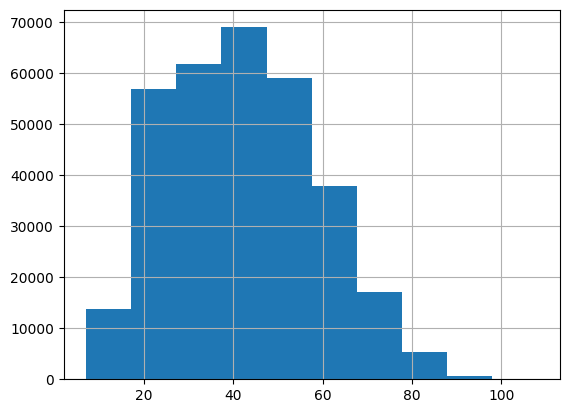

In [43]:
data_no_null_age.Age.hist()

In [44]:
def clasificate(data):
    if data < 18:
        return "<18"
    if data <= 24:
        return "18-24"
    if data <= 34:
        return "25-34"
    if data <= 44:
        return "35-44"
    if data <= 54:
        return "45-54"
    if data <= 64:
        return "55-64"
    return "65+"

In [45]:
data_no_null_age["age_group"] = data_no_null_age.Age.apply(lambda x: clasificate(x))
data_no_null_age

C:\Users\Павло\AppData\Local\Temp\ipykernel_5904\1372102028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["age_group"] = data_no_null_age.Age.apply(lambda x: clasificate(x))


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [46]:
grouped_data = data_no_null_age[["Age", "Impressions", "Clicks", "age_group"]].groupby("age_group").mean()
grouped_data

,Age,Impressions,Clicks
age_group,,,
18-24,20.833317,5.002826,0.053251
25-34,29.503352,4.993829,0.050486
35-44,39.494680,5.021507,0.051679
45-54,49.492580,5.010406,0.050274
55-64,59.498189,5.022308,0.101837
65+,72.988697,5.012347,0.151289
<18,15.262149,5.007159,0.149335


In [47]:
grouped_data["CTR"] = grouped_data.Clicks / grouped_data.Impressions
grouped_data

,Age,Impressions,Clicks,CTR
age_group,,,,
18-24,20.833317,5.002826,0.053251,0.010644
25-34,29.503352,4.993829,0.050486,0.010110
35-44,39.494680,5.021507,0.051679,0.010292
45-54,49.492580,5.010406,0.050274,0.010034
55-64,59.498189,5.022308,0.101837,0.020277
65+,72.988697,5.012347,0.151289,0.030183
<18,15.262149,5.007159,0.149335,0.029824


<AxesSubplot: xlabel='age_group', ylabel='CTR'>

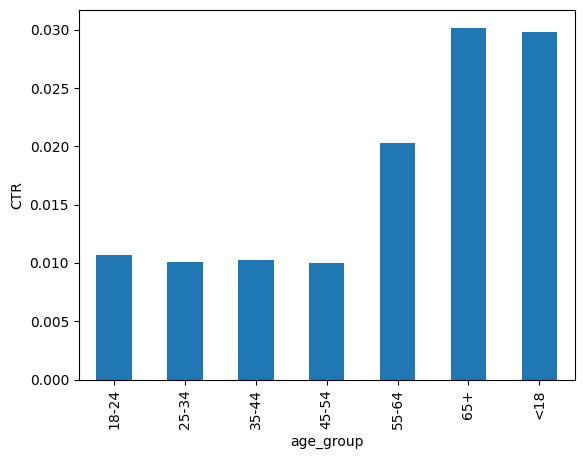

In [48]:
grouped_data.CTR.plot(kind="bar", ylabel="CTR")

In [49]:
#grouped_data_genders = data_no_null_age.groupby(["Gender", "age_group"]).count()
grouped_data_genders = data_no_null_age.loc[data_no_null_age["age_group"] == "25-34"].groupby("Gender")[["Impressions", "Clicks"]].sum()
grouped_data_genders

,Impressions,Clicks
Gender,,
0,136292,1388
1,154219,1549


<AxesSubplot: xlabel='Gender', ylabel='Number'>

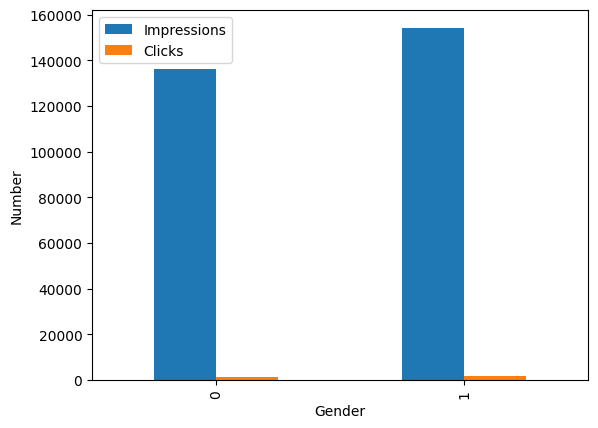

In [50]:
grouped_data_genders.plot(kind="bar", xlabel="Gender", ylabel="Number")

<AxesSubplot: xlabel='Gender(1-male, 2-female) Age_group', ylabel='Impressions median'>

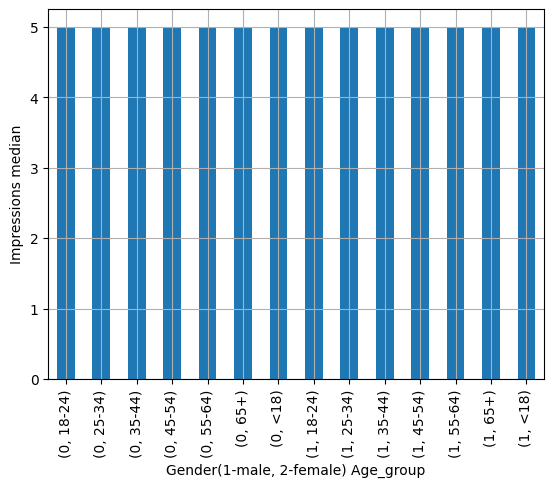

In [89]:
grouped_data_statistic = data_no_null_age.groupby(["Gender", "age_group"])
grouped_data_statistic.Impressions.median().plot(kind="bar", grid = "true", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Impressions median")
#grouped_data_genders = data_no_null_age.groupby(["Gender", "age_group"])
#grouped_data_genders["CTR"] = grouped_data_genders.Clicks / grouped_data_genders.Impressions

<AxesSubplot: xlabel='Gender(1-male, 2-female) Age_group', ylabel='Max clicks'>

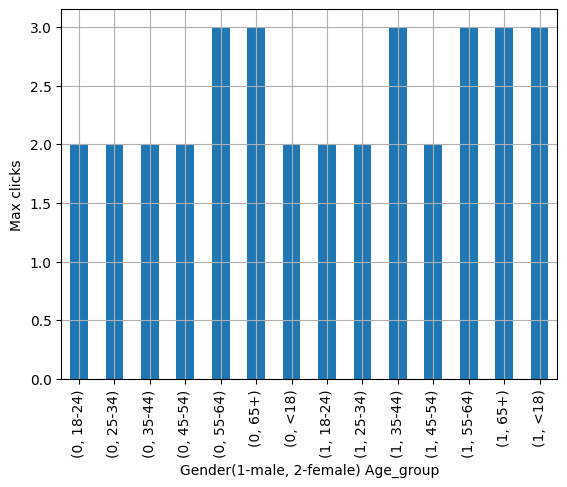

In [52]:
grouped_data_statistic.Clicks.max().plot(kind="bar", grid = "true", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Max clicks")

<AxesSubplot: xlabel='Gender(1-male, 2-female) Age_group', ylabel='Impressions Max'>

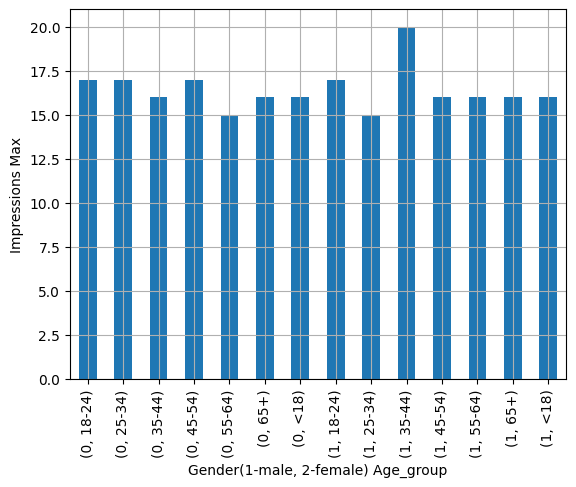

In [53]:
grouped_data_statistic.Impressions.max().plot(kind="bar", grid = "true", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Impressions Max")

C:\Users\Павло\AppData\Local\Temp\ipykernel_5904\1660560067.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data_statistic["Age", "Clicks"].std().plot(kind="bar", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Dispersion")


<AxesSubplot: xlabel='Gender(1-male, 2-female) Age_group', ylabel='Dispersion'>

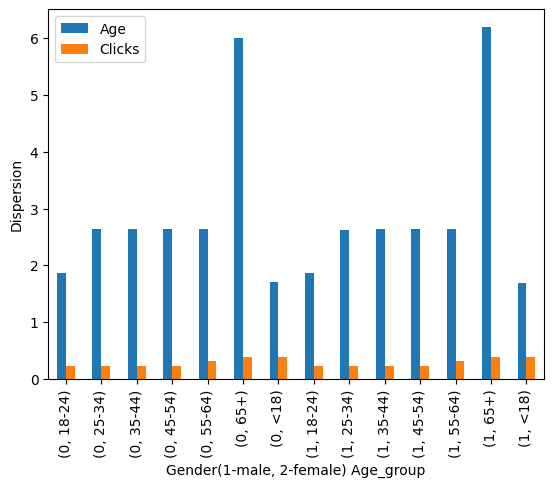

In [54]:
grouped_data_statistic["Age", "Clicks"].std().plot(kind="bar", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Dispersion")

<AxesSubplot: xlabel='Gender(1-male, 2-female) Age_group', ylabel='Clicks mean'>

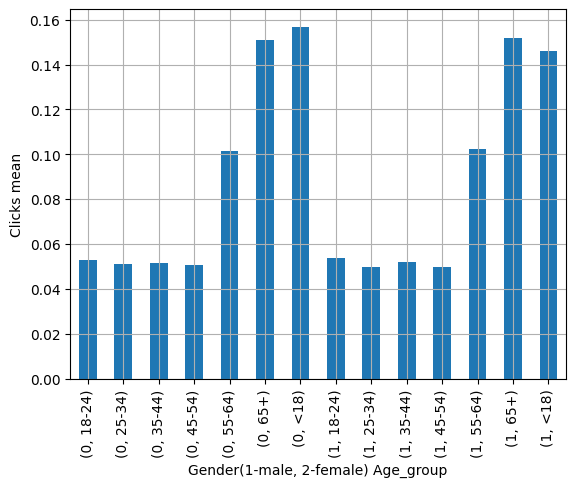

In [55]:
grouped_data_statistic.Clicks.mean().plot(kind="bar", grid = "true", xlabel="Gender(1-male, 2-female) Age_group", ylabel="Clicks mean")

In [56]:
grouped_data_age = grouped_data_statistic = data_no_null_age.groupby(["age_group"])

In [103]:
table = grouped_data_age[["Impressions", "Clicks"]].mean()
table.rename(columns={"Impressions": "mean_impressions", "Clicks": "mean_clicks"}, inplace=True)
table["disp_impressions"] = grouped_data_age["Impressions"].std()
table["disp_clicks"] = grouped_data_age["Clicks"].std()
table["max_impressions"] = grouped_data_age["Impressions"].max()
table["max_clicks"] = grouped_data_age["Clicks"].max()
table["quantile_impressions"] = grouped_data_age["Impressions"].quantile(0.5)
table["quantile_clicks"] = grouped_data_age["Clicks"].quantile(0.9)
table

,mean_impressions,mean_clicks,disp_impressions,disp_clicks,max_impressions,max_clicks,quantile_impressions,quantile_clicks
age_group,,,,,,,,
18-24,5.002826,0.053251,2.244950,0.231010,17,2,5.0,0.0
25-34,4.993829,0.050486,2.226877,0.224147,17,2,5.0,0.0
35-44,5.021507,0.051679,2.237829,0.225861,20,3,5.0,0.0
45-54,5.010406,0.050274,2.240790,0.225034,17,2,5.0,0.0
55-64,5.022308,0.101837,2.230206,0.318704,16,3,5.0,0.0
65+,5.012347,0.151289,2.249162,0.384373,16,3,5.0,1.0
<18,5.007159,0.149335,2.271897,0.383411,16,3,5.0,1.0
